#Task 1: Data Preparation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Class names: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
Loaded 17040 images with shape (17040, 28, 28), labels shape (17040,)
Class names: ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']
Loaded 3063 images with shape (3063, 28, 28), labels shape (3063,)
Training set: (17040, 28, 28, 1), Labels: (17040, 10)
Testing set: (3063, 28, 28, 1), Labels: (3063, 10)


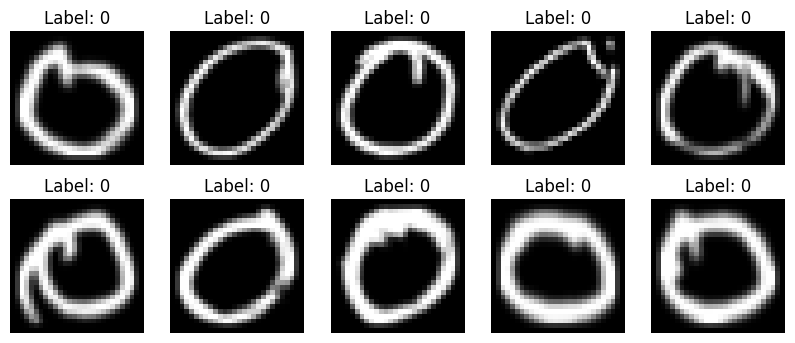

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

# Training and testing directory
train_dir = "/content/drive/MyDrive/Final Year-2nd Semester-ALL MODULES NOTES AND COMPLETED ASSIGNMENTS/Artificial Intelligence and Machine Learning/Week4/Train"
test_dir = "/content/drive/MyDrive/Final Year-2nd Semester-ALL MODULES NOTES AND COMPLETED ASSIGNMENTS/Artificial Intelligence and Machine Learning/Week4/Test"

# Defining the image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted([name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))])
    print(f"Class names: {class_names}")
    class_map = { name: i for i, name in enumerate(class_names) }
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            try:
                img = Image.open(img_path).convert("L")
                img = img.resize((img_width, img_height))
                img = np.array(img) / 255.0
                if img.shape != (img_height, img_width):
                    print(f"Skipping image {img_path}: incorrect shape {img.shape}")
                    continue
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)
    print(f"Loaded {len(images)} images with shape {images.shape}, labels shape {labels.shape}")
    return images, labels

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

#Task 2: Build the FCN Model

In [5]:
import tensorflow as tf
from tensorflow import keras

num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),  # Changed to relu for better performance
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax"),
])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

#Task 3: Compile the Model

###Compiling the Model

In [7]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

#Task 4: Train the Model

In [8]:
# Debugging checks
# print(f"x_train type: {type(x_train)}, shape: {x_train.shape}, dtype: {x_train.dtype}")
# print(f"y_train type: {type(y_train)}, shape: {y_train.shape}, dtype: {y_train.dtype}")

# if not isinstance(x_train, np.ndarray) or not isinstance(y_train, np.ndarray):
#     raise ValueError("x_train or y_train is not a NumPy array")
# if x_train.size == 0 or y_train.size == 0:
#     raise ValueError("x_train or y_train is empty")
# if x_train.shape[0] != y_train.shape[0]:
#     raise ValueError(f"Number of samples mismatch: x_train has {x_train.shape[0]} samples, y_train has {y_train.shape[0]} samples")

batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks,
)



Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6881 - loss: 0.9692 - val_accuracy: 0.0018 - val_loss: 15.8382
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9519 - loss: 0.1500 - val_accuracy: 0.0023 - val_loss: 17.1244
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9714 - loss: 0.0966 - val_accuracy: 0.0023 - val_loss: 16.1560
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9816 - loss: 0.0635 - val_accuracy: 0.0018 - val_loss: 17.1097
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9876 - loss: 0.0443 - val_accuracy: 0.0023 - val_loss: 16.8791


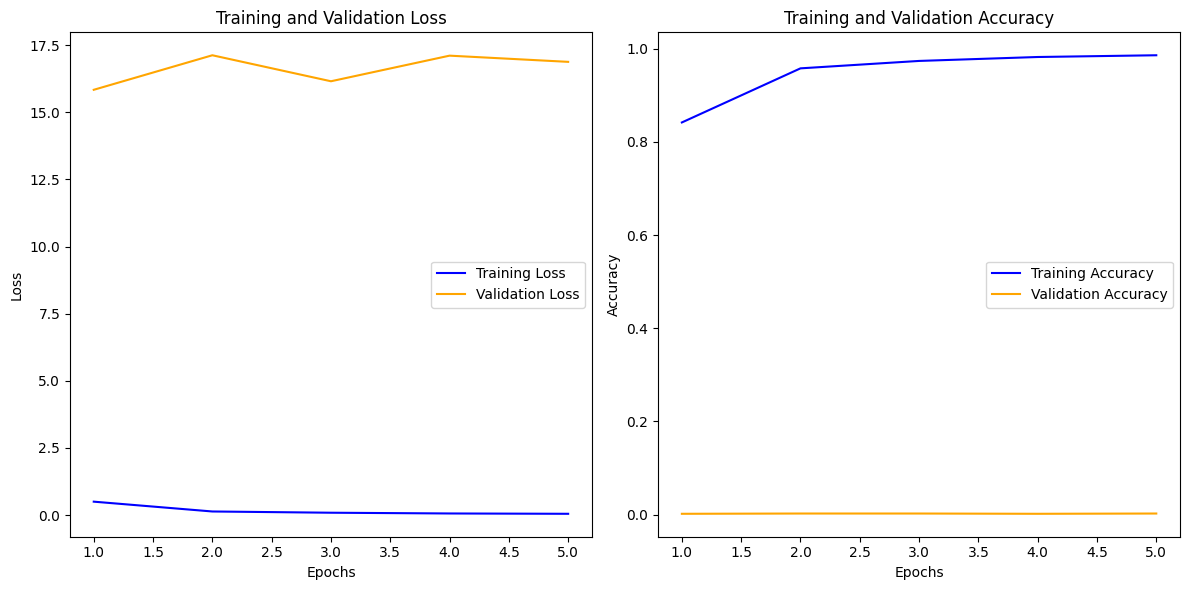

In [9]:
# Plot training and validation metrics
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", color="blue")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
if train_acc and val_acc:
    plt.plot(range(1, len(train_acc) + 1), train_acc, label="Training Accuracy", color="blue")
    plt.plot(range(1, len(val_acc) + 1), val_acc, label="Validation Accuracy", color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()

plt.tight_layout()
plt.show()

#Task 5: Evaluate the Model

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

96/96 - 0s - 4ms/step - accuracy: 0.7731 - loss: 3.3974
Test accuracy: 0.7731


#Task 6: Save and Load the Model

###1. Saving the Model:

In [11]:
model.save("mnist_fully_connected_model.keras")


###2. Loading the Model:

In [12]:
loaded_model = tf.keras.models.load_model("mnist_fully_connected_model.keras")

#Task 7: Predictions

In [13]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 0
True label for first image: 0
